<a href="https://colab.research.google.com/github/imahrukh/AI2002/blob/main/labs/lab10/lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [4]:
#kmeans
def initialize_centroids(data, k):
    #Randomly initialize the centroids from the data points."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]
    return centroids

def compute_distances(data, centroids):
    #Compute the distances between each data point and centroids."""
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return distances

def assign_clusters(distances):
    #Assign each data point to the closest centroid."""
    clusters = np.argmin(distances, axis=0)
    return clusters

def update_centroids(data, clusters, k):
    #Update the centroids by computing the mean of the points in each cluster."""
    centroids = np.array([data[clusters == i].mean(axis=0) for i in range(k)])
    return centroids

def k_means(data, k, max_iterations=100):
    #Implement the K-means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters


In [6]:
k = 4
# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -
centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares:",wcss)

Total within-cluster sum of squares: 17.46619760906058


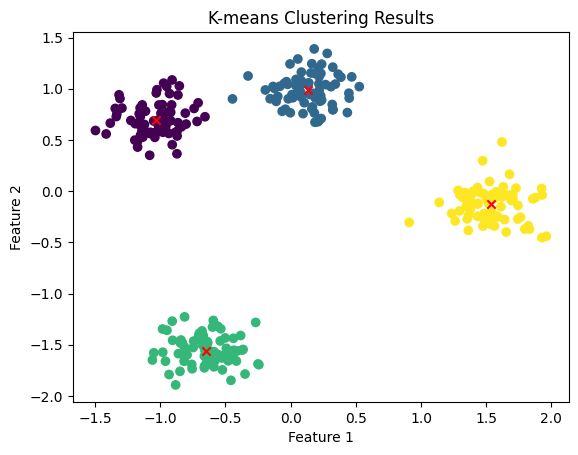

In [8]:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker='x')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-means Clustering Results")
plt.show()

In [9]:

def initialize_medoids(data, k):
    #Randomly initialize the medoids from the data points."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    medoids = data[indices]
    return medoids

def compute_dissimilarities(data, medoids):
    #Compute the dissimilarities between each data point and medoids."""
    dissimilarities = np.sqrt(((data - medoids[:, np.newaxis])**2).sum(axis=2))
    return dissimilarities

def assign_clusters(dissimilarities):
    #Assign each data point to the closest medoid."""
    clusters = np.argmin(dissimilarities, axis=0)
    return clusters

def update_medoids(data, clusters, k):
    #Update the medoids by selecting the data point with the minimum sum of
    #dissimilarities in each cluster.

    new_medoids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            # Calculate dissimilarities within the cluster
            cluster_dissimilarities = compute_dissimilarities(cluster_points, cluster_points)
            # Sum dissimilarities for each point in the cluster
            total_dissimilarities = np.sum(cluster_dissimilarities, axis=0)
            # Find the point with the minimum sum of dissimilarities
            new_medoid_index = np.argmin(total_dissimilarities)
            new_medoids.append(cluster_points[new_medoid_index])
        else:
            # Handle empty clusters (e.g., randomly select a new medoid)
            new_medoids.append(data[np.random.choice(data.shape[0])])
    return np.array(new_medoids)


def k_medoids(data, k, max_iterations=100):
    #Implement the K-medoids clustering algorithm."""
    medoids = initialize_medoids(data, k)
    for _ in range(max_iterations):
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        new_medoids = update_medoids(data, clusters, k)
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return medoids, clusters


In [10]:
# Run the K-medoids algorithm
medoids, clusters = k_medoids(data_scaled, k)

# Compute the total within-cluster sum of squares for k-medoids
wcss_medoids = np.sum([np.sum(np.square(data_scaled[clusters == i] -
                                        medoids[i])) for i in range(k)])
print("Total within-cluster sum of squares (K-medoids):", wcss_medoids)



Total within-cluster sum of squares (K-medoids): 70.45942532056458


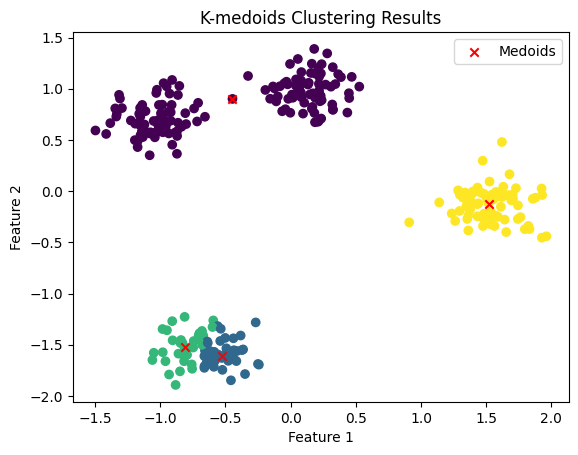

In [11]:
# Plot the dataset with the assigned clusters and medoids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
plt.scatter(medoids[:, 0], medoids[:, 1], c="red", marker='x', label="Medoids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-medoids Clustering Results")
plt.legend()
plt.show()



In [12]:
#Comparison
print("KMeans WCSS:",wcss)
print("Kmedoids WCSS:",wcss_medoids)

KMeans WCSS: 17.46619760906058
Kmedoids WCSS: 70.45942532056458
